In [ ]:
# !pip install tensorflow-gpu

In [1]:
# importing libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
print(tf.__version__)

2.8.2


In [3]:
#dataset

data = pd.read_csv('/content/drive/MyDrive/Deep Learning/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Shape of dataset

data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
X = data.iloc[ : ,3 : 13]
y = data.iloc[ : , 13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
# Creating dummies

geo = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [11]:
X = pd.concat([X, geo, gender], axis=1)

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [13]:
X.drop(['Geography', 'Gender'], axis=1, inplace = True)

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [15]:
# Splitting  dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=17)

In [16]:
# Feature scaling

sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [17]:
# Artificial Neural Network (ANN)

from tensorflow.keras.models import Sequential  #to go layer by layer, create 
from tensorflow.keras.layers import Dense #Creates neurons
from tensorflow.keras.layers import ReLU, LeakyReLU #Activation function
from tensorflow.keras.layers import Dropout #to dropout unnecessary neurons

In [18]:
#Initilizing ANN

sequence = Sequential()

In [19]:
#Adding input layer 

sequence.add(Dense(units=11, activation='relu'))

In [20]:
#Adding hidden layer 1

sequence.add(Dense(units=6, activation='relu'))

In [21]:
#Adding hidden layer 2

sequence.add(Dense(units=4, activation='relu'))

In [22]:
#Adding output layer

sequence.add(Dense(units=1,activation='sigmoid'))

In [23]:
#Opimizing

sequence.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
model_history = sequence.fit(X_train_scale, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3106 - accuracy: 0.8744 - val_loss: 0.3650 - val_accuracy: 0.8520
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3101 - accuracy: 0.8737 - val_loss: 0.3700 - val_accuracy: 0.8490
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3099 - accuracy: 0.8752 - val_loss: 0.3628 - val_accuracy: 0.8537
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3107 - accuracy: 0.8725 - val_loss: 0.3636 - val_accuracy: 0.8542
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3110 - accuracy: 0.8720 - val_loss: 0.3629 - val_accuracy: 0.8542
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3118 - accuracy: 0.8748 - val_loss: 0.3645 - val_accuracy: 0.8542
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3108 - accuracy: 0.8761 - val_loss: 0.3676 - val_accuracy: 0.8533

In [34]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

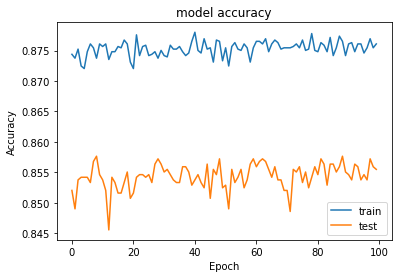

In [36]:
# Summarize history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
# plt.xticks(range(0,101))
# plt.yticks(range(0,101))
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.show()


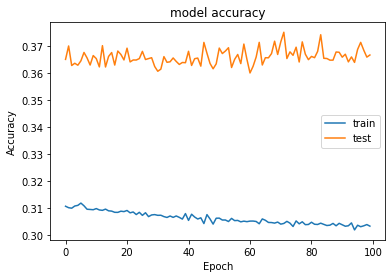

In [37]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
# plt.xticks(range(0,101))
# plt.yticks(range(0,101))
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.show()

In [40]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [41]:
model_history = sequence.fit(X_train_scale, y_train, validation_split=0.33, batch_size=10, epochs=100, callbacks=early_stop)

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3029 - accuracy: 0.8737 - val_loss: 0.3687 - val_accuracy: 0.8555
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3019 - accuracy: 0.8746 - val_loss: 0.3649 - val_accuracy: 0.8533
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3032 - accuracy: 0.8731 - val_loss: 0.3682 - val_accuracy: 0.8516
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3037 - accuracy: 0.8742 - val_loss: 0.3671 - val_accuracy: 0.8559
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3028 - accuracy: 0.8757 - val_loss: 0.3661 - val_accuracy: 0.8537
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3034 - accuracy: 0.8750 - val_loss: 0.3690 - val_accuracy: 0.8546
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3016 - accuracy: 0.8735 - val_loss: 0.3672 - val_accuracy: 0.8546